# **Coursework 2 Template**

---
The second coursework is related to CNNs (Convolutional Neural Networks) tasks, designing a CNN architecture trained by the CIFAR-10
dataset, to classify the CIFAR-10 test images with higher accuracy than the
network in [Practical 9](https://colab.research.google.com/drive/13Oy-i1RLytQLKl7a-LKPzqETp5EzGDHd?usp=share_link). The changes that you can apply to improve the performance of the network can be as below but are not limited to them.
1. Different optimisers, different learning rates and a different number of
epochs to check the performance of the model.
2. Different designs of convolution layers and activation functions, then
modify the architecture to improve the performance of the
model by adding different layers and changing the hyperparameters.
3. Explore the classes which are defined as wrong classes according to
the confusion matrix and find how you can build the model to have a better
prediction of these classes

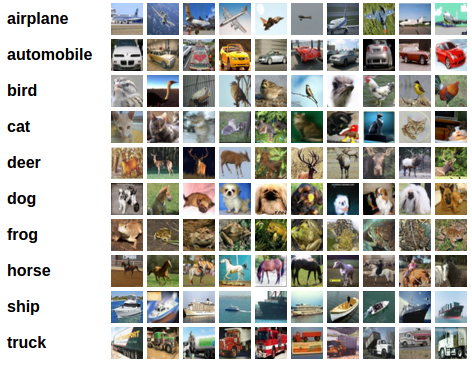



In [26]:
# Insatlling Pyorch

!pip install torch
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
#Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from torch.utils.tensorboard import SummaryWriter

In [28]:
#check pytorch version
print(torch.__version__)
print(torchvision.__version__)

2.0.0+cu118
0.15.1+cu118


## Loading the CIFAR-10 data and pre-processing

* Here you can try to see if by changing the "batch_size" you will get any difference in your final results. 

In [29]:
transform =transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_set = torchvision.datasets.CIFAR10(root = './data', train=True,  transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 32, shuffle=True)

test_set = torchvision.datasets.CIFAR10(root = './data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Let's view some of the training images in the way they are passed as batches to the Neural Network during the training process.

torch.Size([32, 3, 32, 32])
torch.Size([32])
labels: tensor([4, 8, 0, 6, 2, 8, 1, 1, 5, 5, 4, 4, 0, 2, 8, 9, 0, 6, 9, 1, 9, 9, 1, 2,
        4, 3, 7, 1, 8, 0, 4, 5])


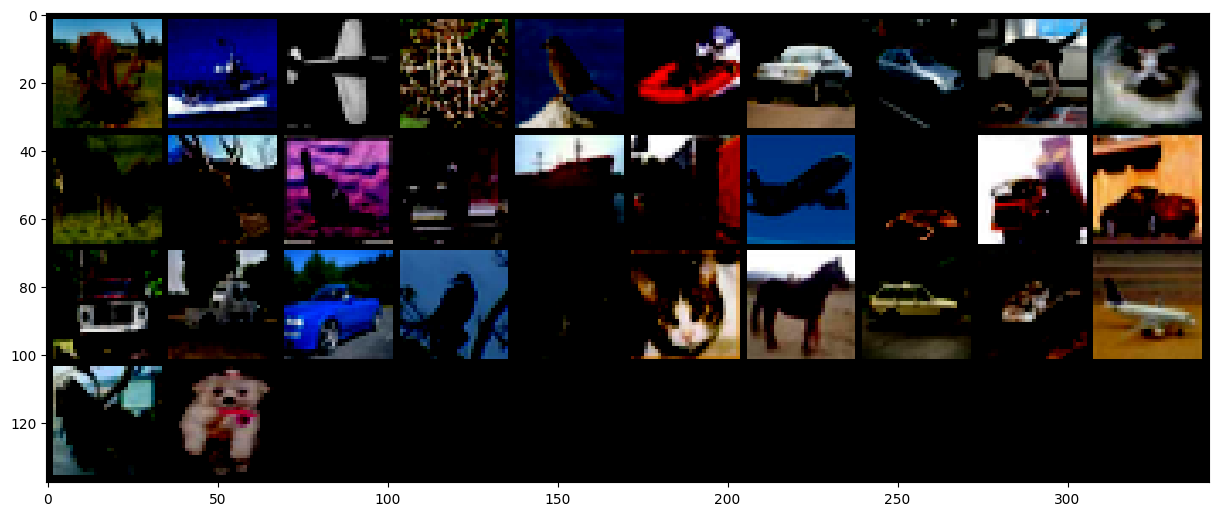

In [30]:
batch = next(iter(train_loader))

images, labels = batch

print(images.shape)
print(labels.shape)
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

print('labels:', labels)

## Neural Network and PyTorch design

* Here you can try to change and modify of some layers of the CNN and check if there is any improvement in the training process. 

In [31]:
class Network(nn.Module):
   

    def __init__(self):
        
        super(Network, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

network = Network()
if torch.cuda.is_available():
  network.cuda()

## Training the Neural Network
Defining a Loss Function and a Optimizer.

* Here you can try different optimiser and learning rate, then check the difference in the performance of the network by using different optimiser and learning rate. 

In [32]:
optimizer = optim.SGD(network.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

In [33]:
for epoch in range(30):

  total_correct = 0
  total_loss = 0
  for batch in train_loader: #Get batch
    images, labels = batch #Unpack the batch into images and labels
    if torch.cuda.is_available():
        images, labels = images.cuda(), labels.cuda()
 
    preds = network(images) #Pass batch
    loss = F.cross_entropy(preds, labels) #Calculate Loss

    optimizer.zero_grad()
    loss.backward() #Calculate gradients
    optimizer.step() #Update weights

    total_loss += loss.item()
    total_correct += preds.argmax(dim=1).eq(labels).sum().item()
    
  print('epoch:', epoch, "total_correct:", total_correct, "loss:", total_loss)

print('>>> Training Complete >>>')

epoch: 0 total_correct: 21151 loss: 2440.8891041874886
epoch: 1 total_correct: 32006 loss: 1573.844277024269
epoch: 2 total_correct: 36302 loss: 1211.1743911206722
epoch: 3 total_correct: 38602 loss: 1004.9200014919043
epoch: 4 total_correct: 40465 loss: 851.6579464226961
epoch: 5 total_correct: 41716 loss: 736.0560014471412
epoch: 6 total_correct: 42994 loss: 629.0405437797308
epoch: 7 total_correct: 43910 loss: 542.4175564162433
epoch: 8 total_correct: 44902 loss: 462.10854268074036
epoch: 9 total_correct: 45664 loss: 389.25044499337673
epoch: 10 total_correct: 46373 loss: 329.17809682898223
epoch: 11 total_correct: 47079 loss: 263.89918465167284
epoch: 12 total_correct: 47501 loss: 222.8831636812538
epoch: 13 total_correct: 47897 loss: 193.0244507174939
epoch: 14 total_correct: 48270 loss: 156.50715271756053
epoch: 15 total_correct: 48520 loss: 134.43388872314245
epoch: 16 total_correct: 48811 loss: 111.75834672572091
epoch: 17 total_correct: 48957 loss: 95.8094662957592
epoch: 18 t

Let's quickly save the model, we just trained.


In [34]:
PATH = './cifar_net.pth'
torch.save(network.state_dict(), PATH)

## Predictions
We will define a function to get all predictions at once. Now, let's load our Saved Model. Please note that saving and re-loading the model wasn’t necessary here, we only did it to illustrate how to do so.

In [35]:
network = Network()
network.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [36]:
@torch.no_grad()
def get_all_preds(model, loader):
  all_preds = torch.tensor([])
  for batch in loader:
    images, labels = batch

    preds = model(images)
    all_preds = torch.cat((all_preds, preds) ,dim=0)

  return all_preds

In [37]:
test_preds = get_all_preds(network, test_loader)
actual_labels = torch.Tensor(test_set.targets)
preds_correct = test_preds.argmax(dim=1).eq(actual_labels).sum().item()

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(test_set))

total correct: 8366
accuracy: 0.8366


The model predicted the label with less than 60% accuracy, which is not that great. Next, we will develop a confusion matrix which will demonstrate, in which particular areas our model is performing poorly.

## Confusion Matrix

* Here you can find the classes that are defined as wrong classes and check what are the common features that model predicted them incorrectly. 

In [38]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[873   5  21  19   5   6   5   4  36  26]
 [ 14 908   1   4   1   2   3   0  10  57]
 [ 58   1 718  35  42  70  54  14   6   2]
 [ 17   4  35 656  37 173  42  17   9  10]
 [ 15   0  29  36 805  53  20  32   7   3]
 [  7   0  17  80  24 832  18  16   3   3]
 [  8   2  16  27  26  21 888   6   4   2]
 [ 11   1  16  15  29  56   6 854   3   9]
 [ 41   7   5   8   1   2   9   3 905  19]
 [ 17  23   1   4   0   1   3   8  16 927]]


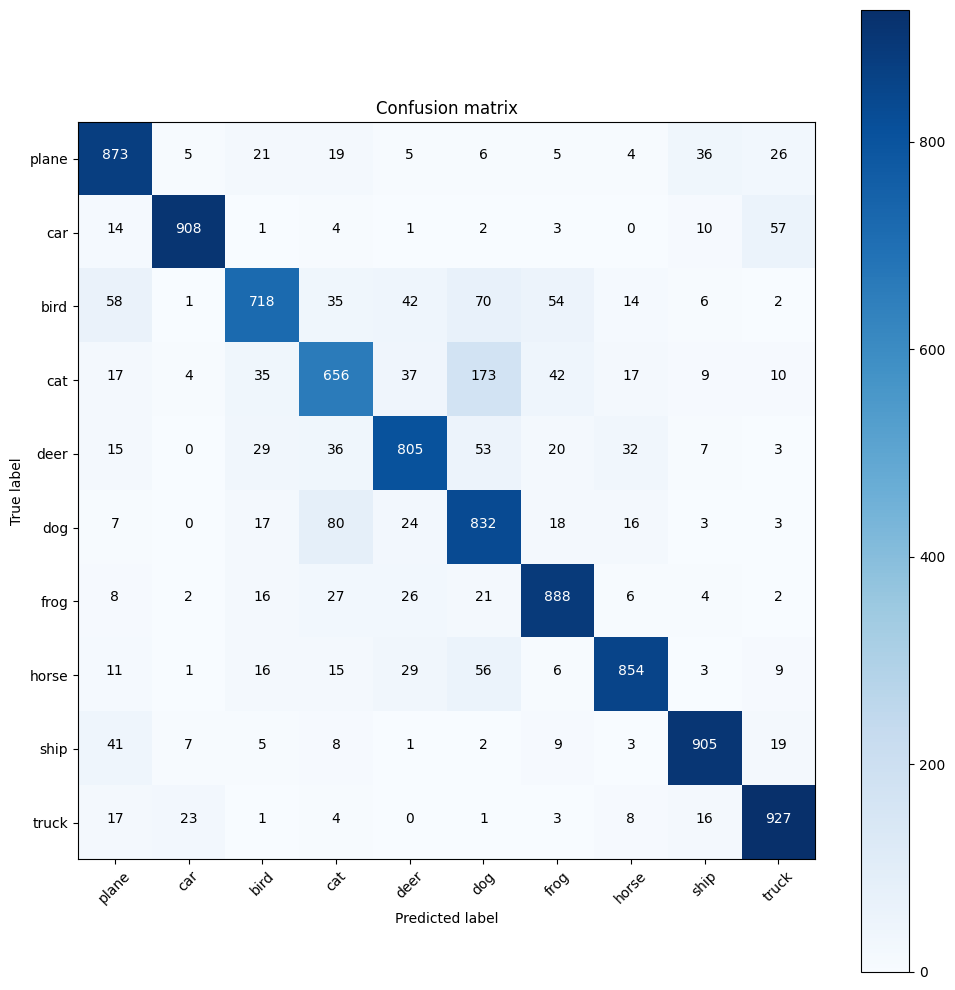

In [39]:
cm = confusion_matrix(test_set.targets, test_preds.argmax(dim=1))
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, classes)